# Constructing a Classifier

## Building a simple classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])
y = [0, 1, 1, 0, 0, 1, 1, 0]

In [3]:
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

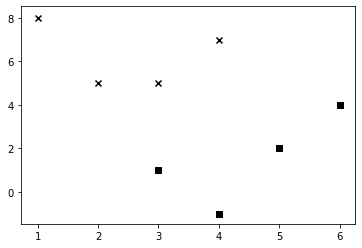

In [4]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')

In [5]:
line_x = range(10)
line_y = line_x

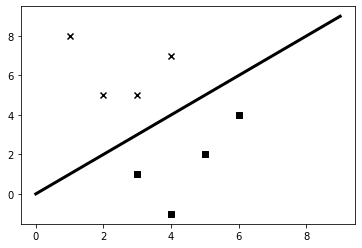

In [6]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3)
plt.show()

## Building a logistic regression classifier

In [7]:
from sklearn import linear_model

In [8]:
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [9]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

In [10]:
classifier.fit(X, y)

/home/renatogbj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    
    # denotes the step size that will be used in the mesh grid
    step_size = 0.01
    
    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # plot the output using a colored plot
    plt.figure()
    
    # choose a color scheme
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    
    plt.show()

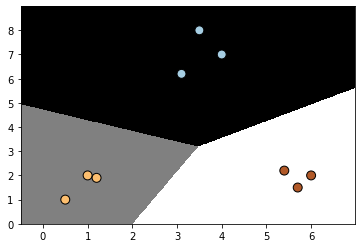

In [12]:
plot_classifier(classifier, X, y)

/home/renatogbj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


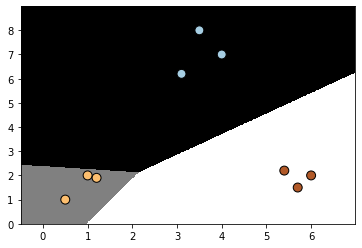

In [13]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=1.0)
classifier.fit(X, y)
plot_classifier(classifier, X, y)

/home/renatogbj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


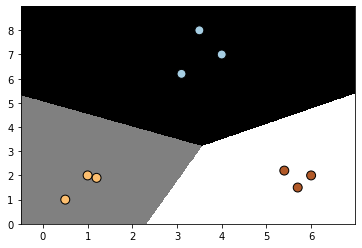

In [14]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=10000)
classifier.fit(X, y)
plot_classifier(classifier, X, y)

## Building a Naive Bayes classifier

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
input_file = 'datasets/data_multivar.txt'

X, y = [], []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])
        
X = np.array(X)
y = np.array(y)

In [17]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

In [18]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 99.5 %


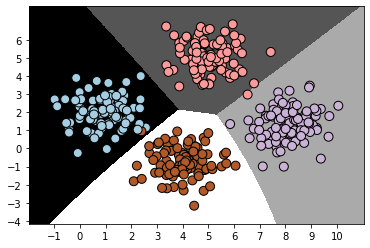

In [19]:
plot_classifier(classifier_gaussiannb, X, y)

## Splitting the dataset for training and testing

In [20]:
from sklearn import model_selection

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_test_pred = classifier_gaussiannb_new.predict(X_test)

In [25]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier =", round(accuracy, 2), "%")

Accuracy of the classifier = 98.0 %


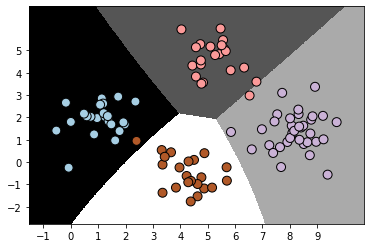

In [26]:
plot_classifier(classifier_gaussiannb_new, X_test, y_test)

## Evaluating the accuracy using cross-validation

In [29]:
num_validations = 5
accuracy = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='accuracy', cv=num_validations)
print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

Accuracy: 99.5%


In [30]:
f1 = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=num_validations)
print("F1: " + str(round(100*f1.mean(), 2)) + "%")

F1: 99.5%


In [31]:
precision = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='precision_weighted', cv=num_validations)
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")

Precision: 99.52%


In [ ]:
recall = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='recall_weighted')